In [ ]:
import cv2, os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Knee-project

/content/drive/MyDrive/Knee-project


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.17.0


In [ ]:
data_path = '/content/drive/MyDrive/Knee-project/Knee-Dataset/'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Doubtful': 0, 'Mild': 1, 'Normal': 2, 'Moderate': 3, 'Severe': 4}
['Doubtful', 'Mild', 'Normal', 'Moderate', 'Severe']
[0, 1, 2, 3, 4]


In [ ]:
img_size = 256
data = []
label = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            # Add preprocessing steps here (e.g., histogram equalization, noise, etc.)
            data.append(resized)
            label.append(label_dict[category])
        except Exception as e:
            print('Exception:', e)

In [ ]:
data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))
label = np.array(label)

In [ ]:
from tensorflow.keras.utils import to_categorical
new_label = to_categorical(label)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, new_label, test_size=0.1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation='softmax'))  # Change 5 based on number of categories

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define your data augmentation generator
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

# Fit the model using the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_val, y_val))  # Pass validation data separately


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 426s 11s/step - accuracy: 0.2619 - loss: 1.5843 - val_accuracy: 0.2727 - val_loss: 1.5572
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 443s 11s/step - accuracy: 0.2953 - loss: 1.5378 - val_accuracy: 0.2761 - val_loss: 1.5140
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 458s 12s/step - accuracy: 0.2959 - loss: 1.5289 - val_accuracy: 0.3165 - val_loss: 1.5076
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 420s 11s/step - accuracy: 0.3331 - loss: 1.4947 - val_accuracy: 0.3131 - val_loss: 1.4826
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 445s 11s/step - accuracy: 0.2854 - loss: 1.5204 - val_accuracy: 0.3603 - val_loss: 1.4792
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 446s 11s/step - accuracy: 0.3135 - loss: 1.4867 - val_accuracy: 0.3468 - val_loss: 1.4721
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 430s 11s/step - accuracy: 0.3645 - loss: 1.4685 - val_accuracy: 0.3636 - val_loss: 1.4406
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 417s 11s/step - accuracy: 0.3446 - loss: 1.4778 - val_accuracy: 0.3300 - val_

In [ ]:
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", val_loss, "%")
print("Test accuracy:", val_accuracy, "%")

Test loss: 1.6108759641647339 %
Test accuracy: 0.27272728085517883 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
A.I predicts: Doubtful
Correct prediction for label 2 is Normal


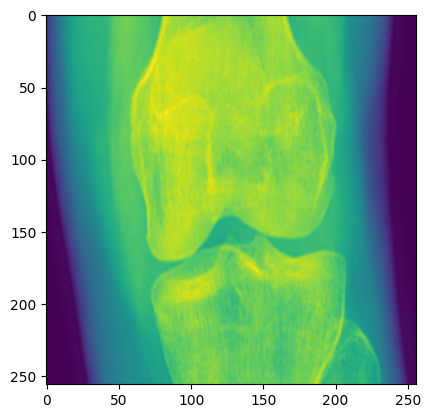

In [ ]:
import matplotlib.pyplot as plt
# Define X as the index of the image in x_test
X = 32  # or any number within the range of your test set

# Use the index to select an image from x_test
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = np.expand_dims(img_single, 0)
img_single = img_single.reshape(img_single.shape[0], 256, 256, 1)

# Predict the category for the selected image
predictions_single = model.predict(img_single)
print('A.I predicts:', categories[np.argmax(predictions_single)])
print("Correct prediction for label", np.argmax(y_test[X]), 'is', categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step


<Figure size 640x480 with 0 Axes>

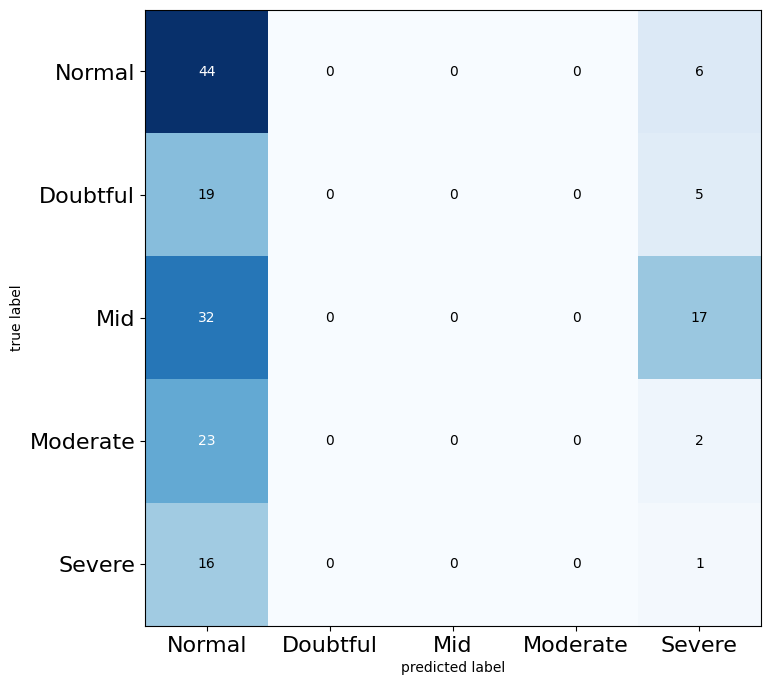

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal', 'Doubtful', 'Mid', 'Moderate', 'Severe'], fontsize=16)
plt.yticks(range(5), ['Normal', 'Doubtful', 'Mid', 'Moderate', 'Severe'], fontsize=16)
plt.show()
